In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [15]:
df = pd.read_csv("loan.csv")

In [16]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [17]:
df.shape

(614, 13)

In [18]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [26]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

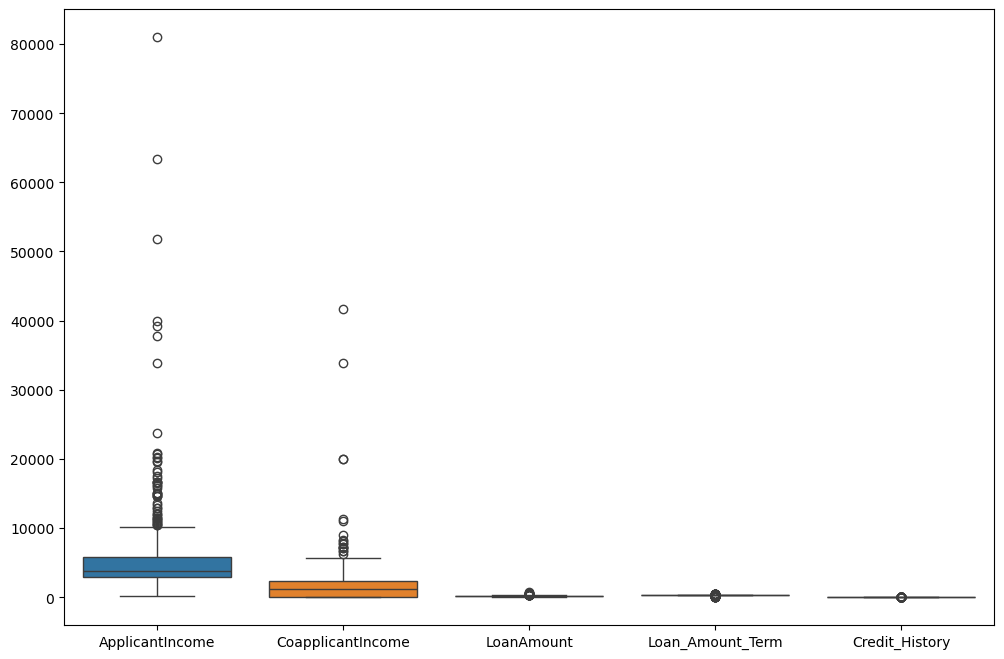

In [28]:
# Checking the outliers
plt.figure(figsize=(12,8))
sns.boxplot(data = df)

In [29]:
# Fill the null values of numerical datatype
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())


In [30]:
# Fill the null values of object datatype
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [34]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Number of people who took loan by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

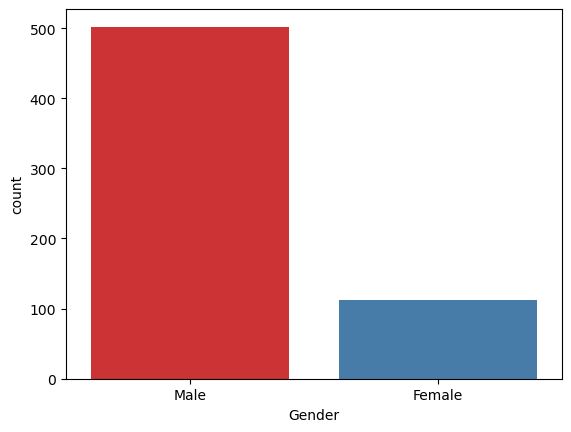

In [36]:
print('Number of people who took loan by gender')
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data = df, palette = 'Set1')
      

Number of people who took loan by married
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

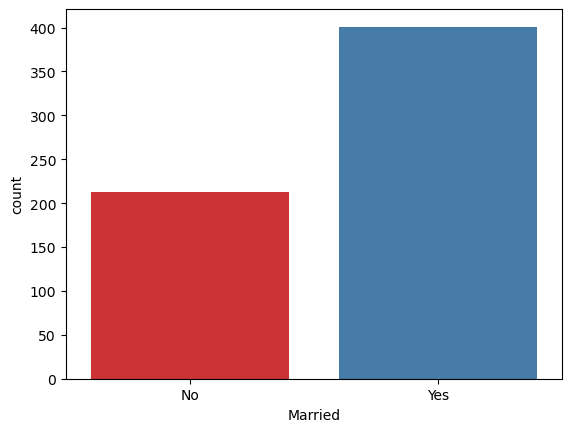

In [37]:
print('Number of people who took loan by married')
print(df['Married'].value_counts())
sns.countplot(x= 'Married', data = df, palette = 'Set1')

Number of people who took loan by education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

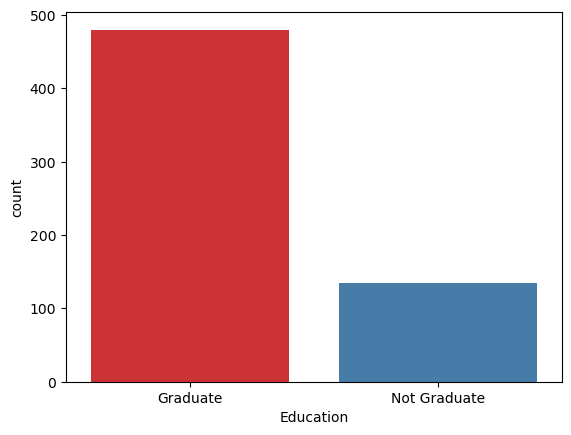

In [39]:
print('Number of people who took loan by education')
print(df['Education'].value_counts())
sns.countplot(x ='Education', data=df, palette='Set1')

<Axes: >

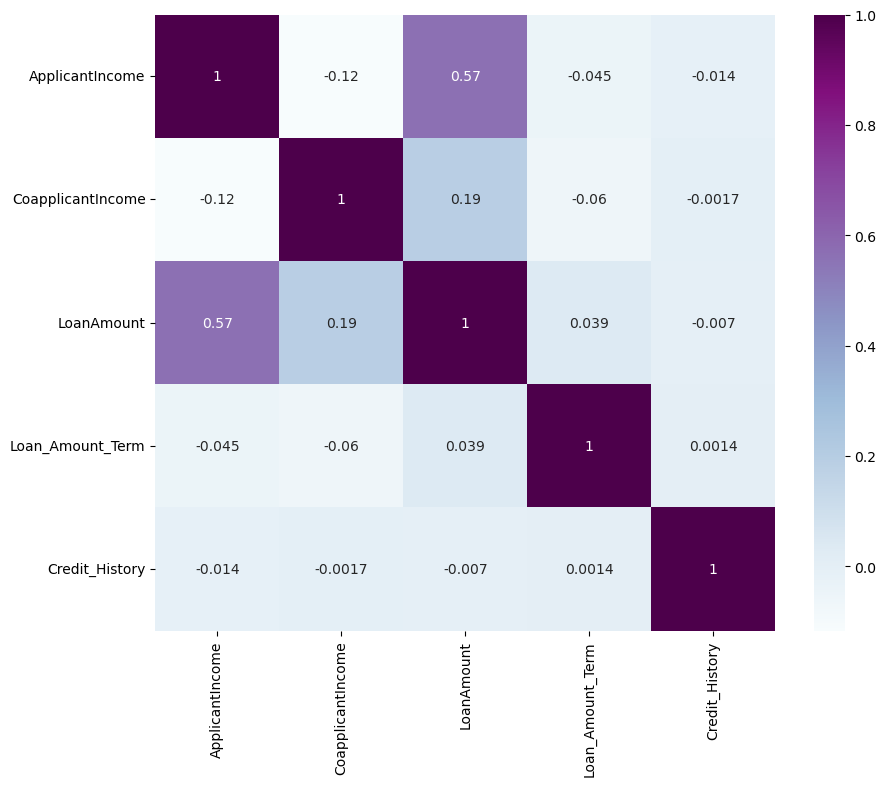

In [41]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot = True, cmap = 'BuPu')

In [42]:
corr = df.corr(numeric_only=True)
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059675,-0.001665
LoanAmount,0.565181,0.189218,1.000000,0.039235,-0.007031
Loan_Amount_Term,-0.045242,-0.059675,0.039235,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007031,0.001395,1.000000


In [44]:
# Total Applicant Income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

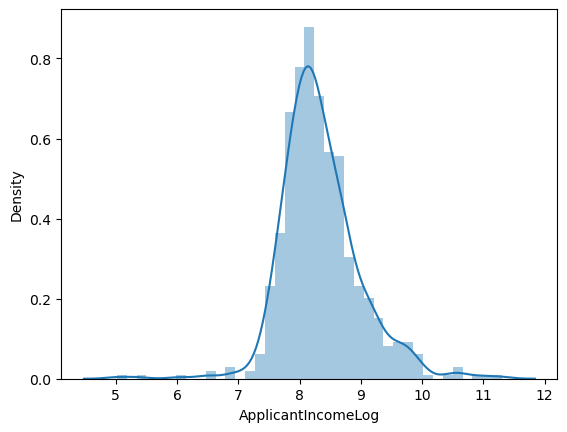

In [45]:
# Apply Log Transformation
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'] + 1)
sns.distplot(df['ApplicantIncomeLog'])

In [46]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681


<Axes: xlabel='LoanAmountLog', ylabel='Density'>

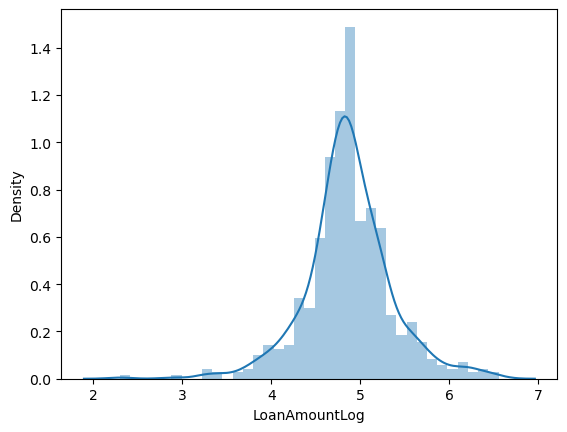

In [50]:
df['LoanAmountLog'] = np.log(df['LoanAmount'] + 1)
sns.distplot(df['LoanAmountLog'])

<Axes: xlabel='Loan_Amount_Term_Log', ylabel='Density'>

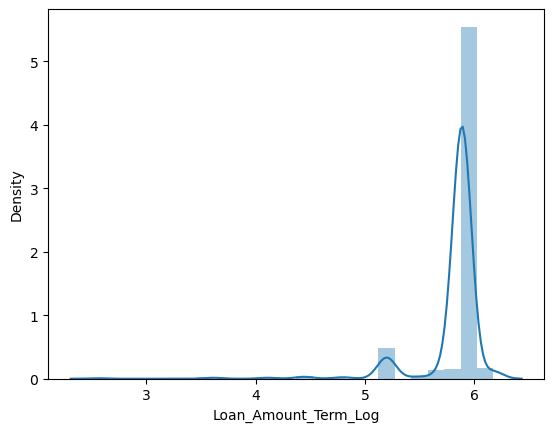

In [51]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'] + 1)
sns.distplot(df['Loan_Amount_Term_Log'])

<Axes: xlabel='Total_Income_Log', ylabel='Density'>

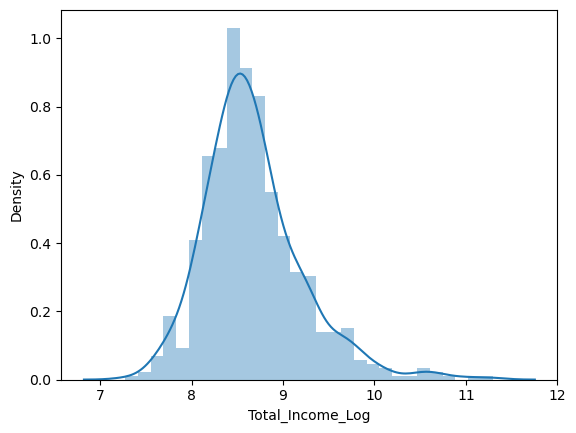

In [54]:
df['Total_Income_Log'] = np.log(df['Total_Income'] + 1)
sns.distplot(df['Total_Income_Log'])

In [55]:
# Drop Unnecessary Columns
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']
df = df.drop(columns = cols, axis = 1)

In [56]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [58]:
# Encoding Technique = Label Encoding,  One Hot Encoding

from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [60]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [61]:
df.dtypes

Gender                    int32
Married                   int32
Dependents                int32
Education                 int32
Self_Employed             int32
Credit_History          float64
Property_Area             int32
Loan_Status               int32
ApplicantIncomeLog      float64
LoanAmountLog           float64
Loan_Amount_Term_Log    float64
Total_Income_Log        float64
dtype: object

In [66]:
# Split Independent And Dependent Features

x = df.drop(columns = ['Loan_Status'], axis = 1)
y = df['Loan_Status']

In [69]:
x

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972811,4.276666,5.888878,7.972811
610,1,1,3,0,0,1.0,0,8.320448,3.713572,5.198497,8.320448
611,1,1,1,0,0,1.0,2,8.996280,5.537334,5.888878,9.025576
612,1,1,2,0,0,1.0,2,8.933796,5.236442,5.888878,8.933796


In [72]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [74]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [78]:
#Logistic Regression
model1 = LogisticRegression()
model1.fit(x_train,y_train)
y_pred_model1 = model1.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_model1)

In [80]:
accuracy*100

77.27272727272727

In [82]:
score = cross_val_score(model1,x,y,cv = 5)
score

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [84]:
np.mean(score)*100

80.9462881514061

In [86]:
# Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_pred_model2 = model2.predict(x_test)
accuracy = accuracy_score(y_pred_model2,y_test)
print("accuracy score of decision tree model: ", accuracy*100)


accuracy score of decision tree model:  72.07792207792207


In [88]:
score = cross_val_score(model2,x,y,cv = 5)
print("cross validation score of decision tree: ",np.mean(score)*100)

cross validation score of decision tree:  70.68372650939624


In [90]:
# Random Classifier
model3 = RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred_model3 = model3.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_model3)
print("accuracy score of random forest model: ", accuracy*100)

accuracy score of random forest model:  78.57142857142857


In [91]:
# KNeighbor Model
model4 = KNeighborsClassifier(n_neighbors = 3)
model4.fit(x_train,y_train)
y_pred_model4 = model4.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_model4)
print("accuracy score of KNeighbor model: ", accuracy*100) 

accuracy score of KNeighbor model:  71.42857142857143


In [94]:
score = cross_val_score(model4,x,y,cv = 3)
print("cross validation score of KNearest Neighbor tree: ",np.mean(score)*100)

cross validation score of KNearest Neighbor tree:  73.94229236410011


In [96]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_pred):
    report = classification_report(y_test,y_pred)
    print(f"classificcation Report For {model_name}:\n{report}\n")

generate_classification_report(model1,y_test,y_pred_model1)
generate_classification_report(model2,y_test,y_pred_model2)
generate_classification_report(model3,y_test,y_pred_model3)
generate_classification_report(model4,y_test,y_pred_model4)

classificcation Report For LogisticRegression():
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154


classificcation Report For DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.62      0.52      0.57        54
           1       0.76      0.83      0.79       100

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154


classificcation Report For RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.86      0.46      0.60        54
           1       0.77      0.96      0.85       100

    accuracy             

In [98]:
df['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [100]:
pip install -U imbalanced-learn

In [105]:
from imblearn.over_sampling import RandomOverSampler

In [109]:
oversample = RandomOverSampler(random_state=42)
x_resampled, y_resampled = oversample.fit_resample(x,y)

df_resampled = pd.concat([pd.DataFrame(x_resampled,columns=x.columns),pd.Series(y_resampled,name="Loan_Status")],axis=1)

In [111]:
x_resampled

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.000000,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.000000,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.000000,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.000000,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.000000,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,3,1,0,1.000000,2,8.292298,4.859812,5.198497,8.292298
840,1,1,1,0,0,0.842199,0,7.539559,4.127134,5.888878,7.539559
841,1,1,1,0,0,0.000000,0,7.933080,4.990433,5.888878,8.456381
842,1,1,2,1,0,0.000000,2,7.969012,3.828641,5.198497,7.969012


In [113]:
y_resampled

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int32

In [115]:
y_resampled.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [119]:
x_resampled_train, x_resampled_test, y_resampled_train, y_resampled_test = train_test_split(x_resampled, y_resampled, test_size = 0.25, random_state=42)

In [125]:
#Logistic Regression
model1 = LogisticRegression()
model1.fit(x_resampled_train,y_resampled_train)
y_pred_model1 = model1.predict(x_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model1)
accuracy*100

69.19431279620854

In [127]:
# Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(x_resampled_train,y_resampled_train)
y_pred_model2 = model2.predict(x_resampled_test)
accuracy = accuracy_score(y_pred_model2,y_resampled_test)
print("accuracy score of decision tree model: ", accuracy*100)

accuracy score of decision tree model:  81.04265402843602


In [133]:
# Random Classifier
model3 = RandomForestClassifier()
model3.fit(x_resampled_train,y_resampled_train)
y_pred_model3 = model3.predict(x_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model3)
print("accuracy score of random forest model: ", accuracy*100)

accuracy score of random forest model:  88.15165876777252


In [135]:
# KNeighbor Model
model4 = KNeighborsClassifier(n_neighbors = 3)
model4.fit(x_resampled_train,y_resampled_train)
y_pred_model4 = model4.predict(x_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model4)
print("accuracy score of KNeighbor model: ", accuracy*100) 

accuracy score of KNeighbor model:  72.51184834123224


In [137]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_pred):
    report = classification_report(y_test,y_pred)
    print(f"classificcation Report For {model_name}:\n{report}\n")

generate_classification_report(model1,y_resampled_test,y_pred_model1)
generate_classification_report(model2,y_resampled_test,y_pred_model2)
generate_classification_report(model3,y_resampled_test,y_pred_model3)
generate_classification_report(model4,y_resampled_test,y_pred_model4)

classificcation Report For LogisticRegression():
              precision    recall  f1-score   support

           0       0.84      0.54      0.65       114
           1       0.62      0.88      0.72        97

    accuracy                           0.69       211
   macro avg       0.73      0.71      0.69       211
weighted avg       0.73      0.69      0.69       211


classificcation Report For DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       114
           1       0.82      0.75      0.78        97

    accuracy                           0.81       211
   macro avg       0.81      0.81      0.81       211
weighted avg       0.81      0.81      0.81       211


classificcation Report For RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       114
           1       0.85      0.91      0.88        97

    accuracy             